# Lab 0
The goal of this lab is to get you started with python and familiarize you with a few commands related to distributions and plotting. It's not a tutorial though, and you may need to refer to other resources. *Most* of solutions are provided. You need to understand these provided solutions (ideally try writing your own solutions before refering to them). 

## Set-up
First, we need to import some useful libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print("Modules Imported!")

Modules Imported!


## Ploting pdf and CDF

In Python, distributions and related functions can be created using scipy.stat. The general form is (using st for scipy.stat, assuming 2 parameters):
```python
myRV = st.RVName(param1,param2,loc=0,scale=1)
```
and you can evaluate the pdf at x with
```python
myRV.pdf(x)
```

The `loc` parameter shifts the distribution (thus affecting its mean) and the `scale` parameter changes its spread (thus changing its standard deviation/variance). Specifically, if 
```python
X = st.RVName(param1,param2,loc=0,scale=1)
Y = st.RVName(param1,param2,loc=m,scale=s)
```
then `Y.pdf(y)` is equivalent to `X.pdf((y-m)/s)/s`. Furthermore, 
$$Y=sX+m,\\ EY = sEX + m,\\ Var(Y) = s^2 Var(X).$$

A random variable is in standardized form if its mean is 0 and its variance is 1 (equivalently, its standard deviation is 1). ```scipy``` sometimes provides the standardized version of a random variable. Given a standardized random variable, we can define a random variable with arbitrary mean $m$ and variance $s^2$ (standard deviation $s$) by setting ```loc=m, scale = s```.


#### $\color{red}{Example\  1}$: 

We will see this for the Beta distribution below. The Beta distributon has two parameters $\alpha$ and $\beta$ (called shape parameters).

(-0.05273405753668501, 2.2)

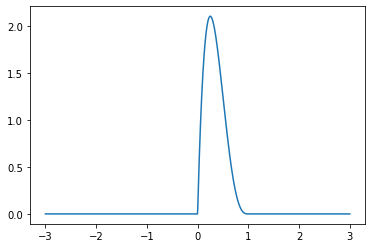

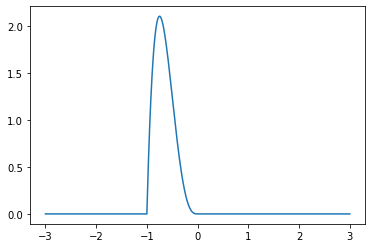

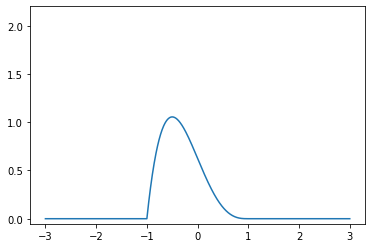

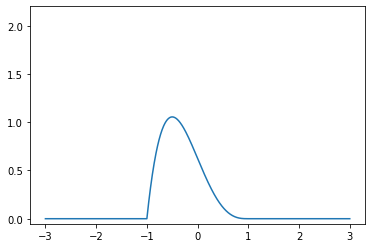

In [ ]:
mybeta = st.beta(2,4) # default location and scale
r = np.linspace(-3,3,1000) # Return evenly spaced numbers over a specified interval.
plt.plot(r,mybeta.pdf(r))

mybeta1 = st.beta(2,4,-1) # shift 1 to the left
plt.figure() 
plt.plot(r,mybeta1.pdf(r))

mybeta2 = st.beta(2,4,-1,2) # FIRST scale by 2 and THEN shift 1 to the left
plt.figure()
plt.plot(r,mybeta2.pdf(r))
plt.ylim(top=2.2)  # adjust the top leaving bottom unchanged, so that the axis limits are similar to previous plots


plt.figure()
plt.plot(r,mybeta.pdf( (r-(-1))/2) /2 ) # same pdf with manual transformation
plt.ylim(top=2.2)  

In Scipy, the normal random variable is defined using its location and scale as `st.norm(loc,scale)`, as it has no other parameters. The location represents the mean and the scale represents the standard deviation:

Text(0.5, 1.0, 'CDF of a N(0,4)')

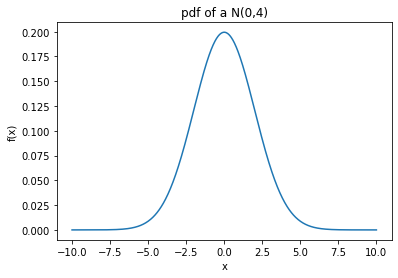

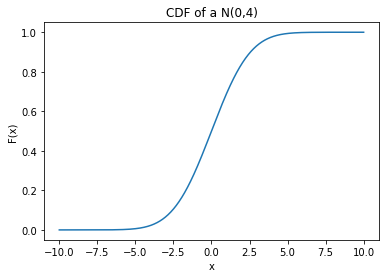

In [ ]:
mynorm = st.norm(0,2)  # normal RV with mean 0 and variance 4 (standard deviation 2)
r = np.linspace(-10,10,1000)
plt.plot(r,mynorm.pdf(r))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('pdf of a N(0,4)')
plt.figure()
plt.plot(r,mynorm.cdf(r))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of a N(0,4)')

#### $\color{red}{Example\ 2}$: 
Plot the pdf and CDF for exponential distribution of rate 3 (mean and standard deviation 1/3), denoted $\mathcal{Exp}(3)$. Use [st.expon(location,scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).



Plot the pdf and CDF for the following three Gamma distributions using [st.gamma(a,loc,scale)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html):
1. Pick arbitrary parameters you like.
2. Gamma distribution representing the sum of two iid exponential random variables of rate 3. The steps are dscribed below (some are analytical not programming):
   - First write the exponential ditribution as a Gamma distribution
   
       Solution: since $f(x)=3 e^{-3 x}$, we can have $\alpha = 1$ and $ \beta = 3$ if we treat it as a gamma distribution, i.e. $x \sim Gamma(1,3)$


   - Find the sum of the independent Gamma RVs (you can use Wikipedia, Google, ... .)
       
       Soultion: if $X \sim Gamma(a, \theta)$ and $Y \sim Gamma(b, \theta)$, we can have $X+Y \sim Gamma(a+b, \theta)$. This can be proofed using the characteristic funtion of the gamma distribution.
   - Plot the Gamma distribution
       
      See the code below.

3. (**Exercise**) Gamma distribution representing the sum of two independent random variables: a Gamma(2,5) RV and an Exp(5) RV




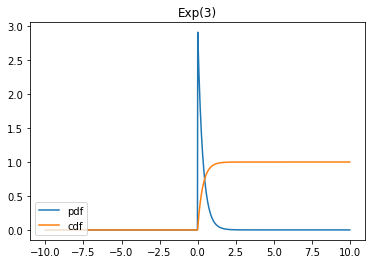

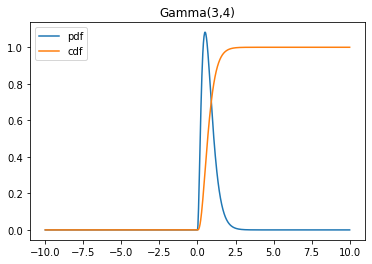

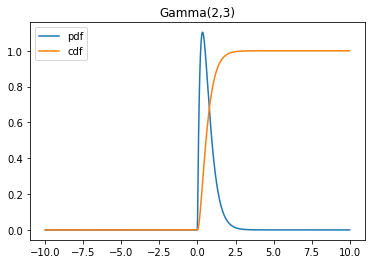

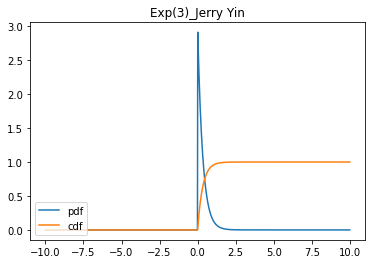

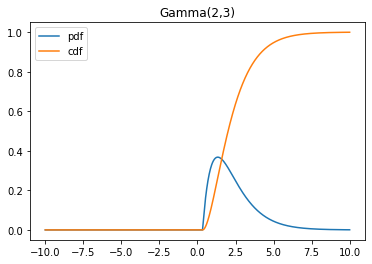

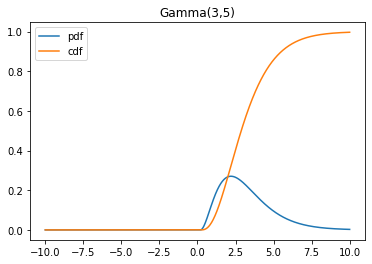

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
r = np.linspace(-10,10,1000) # range for the plot
myexp = st.expon(loc=0,scale=1/3) # expon() gives a random variable with standard deviation equal to 1. We scale it by 1/3 to get the desired RV. 
plt.plot(r,myexp.pdf(r));
plt.plot(r,myexp.cdf(r));
plt.legend(["pdf","cdf"],loc=3);
plt.title("Exp(3)");

# Gamma(alpha = 3, beta = 4)
plt.figure()
mygamma = st.gamma(3,loc=0,scale=1/4) # the beta parameter of the Gamma distribution appears as scale = 1/beta
plt.plot(r,mygamma.pdf(r));
plt.plot(r,mygamma.cdf(r));
plt.title("Gamma(3,4)");
plt.legend(["pdf","cdf"],loc=2);

# Exp(3) = Gamma(1,3)
# Gamma(1,3) + Gamma(1,3) = Gamma(2,3)
plt.figure()
mygamma = st.gamma(2,loc=0,scale=1/3)
plt.plot(r,mygamma.pdf(r));
plt.plot(r,mygamma.cdf(r));
plt.title("Gamma(2,3)");
plt.legend(["pdf","cdf"],loc=2);

# Begin Solution:

# exponential distribution
plt.figure()
myexp = st.expon(loc=0,scale=1/3)
plt.plot(r,myexp.pdf(r))
plt.plot(r,myexp.cdf(r))
plt.legend(["pdf","cdf"],loc=3)
plt.title("Exp(3)_Jerry Yin")

# gamma distribution
plt.figure()
gamm = st.gamma(2,1/3)
plt.plot(r,gamm.pdf(r))
plt.plot(r,gamm.cdf(r))
plt.title('Gamma(2,3)')
plt.legend(['pdf','cdf'],loc=2)

# exercise
# we can treat Exp(5) as Gamma(1,5), so the sum of two independent RVs is 
# Gamma(2,5) + Gamma(1,5) = Gamma(3,5)
plt.figure()
sumgamma = st.gamma(3,1/5)
plt.plot(r,sumgamma.pdf(r))
plt.plot(r,sumgamma.cdf(r))
plt.title('Gamma(3,5)')
plt.legend(['pdf','cdf'],loc=2)

# End Solution

## Sampling from distributions
Law of large numbers (LLN) states that under certain conditions the average of many samples of a random variable goes to its expected value as the number of samples increases. 
$$\frac1n\sum_{i=1}^n X_i\to E[X] \text{  as  } n\to \infty $$
This allows us to estimate the mean and variance of a RV by taking many samples. For variance, in the above equation, we replace $X$ with $(X-E[X])^2$. 

#### $\color{red}{Example\  3}$:

In the following example, we estimate the mean and variance of $\mathcal N(0,4)$ by sampling.

In [ ]:
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
m = sum(X)/len(X) # Average as an estimate of mean
print(m) # Compare with 0
v = sum([(x-m)*(x-m) for x in X])/len(X)
print(v) # Compare with 4

-0.01884430598423834
4.084291762247395


#### $\color{red}{Example\  4}$: 
Let $X\sim \mathcal N(0,4)$ and $Y\sim \mathcal N(3,25)$. By generating samples, estimate $E[X+Y^2]$, $EX+(E[Y])^2$, $EX+E[Y^2],$ and compare the estimates with the true values.

In [ ]:
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
Y = st.norm.rvs(3,5,size=10000) # Getting 10000 samples from N(3,25)
Y2 = [Y[i]*Y[i] for i in range(10000)]
XY2 = [X[i]+Y[i]*Y[i] for i in range(10000)]
EX = sum(X)/len(X) # Average as an estimate of mean
EY = sum(Y)/len(Y) # Average as an estimate of mean
EY2 = sum(Y2)/len(Y2) # Average as an estimate of mean
EXY2 = sum(XY2)/len(XY2) # Average as an estimate of mean
print("E[X+Y^2]: Estimate =",EXY2,", True =", 34)
print("E[X]+E[Y]^2: Estimate =",EX+EY*EY, ", True =9")
print("E[X]+E[Y^2]: Estimate = ",EX+EY2, ", True =", 34)
print("By linearity property of expectation, we expect the first and third values to be the same!")

E[X+Y^2]: Estimate = 33.752848462768554 , True = 34
E[X]+E[Y]^2: Estimate = 9.314194272435714 , True =9
E[X]+E[Y^2]: Estimate =  33.75284846276839 , True = 34
By linearity property of expectation, we expect the first and third values to be the same!


## Samples and histogram
If we take many samples from a given distribution, the histogram of those samples will be similar to the pdf because the fraction of samples in each small interval around a given value tends to the value of the pdf at that point when the number of samples is large. We can see this in action. (Natuarally, this can be used to estimate the pdf from samples. See also [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).)

#### $\color{red}{Example\  5}$:

In the following example, we estimate the pdf of $\mathcal N(0,4)$ through [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html).

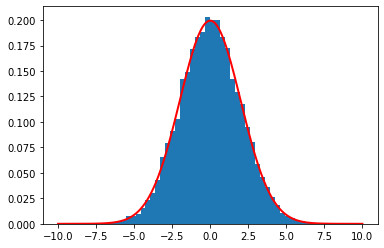

In [ ]:
mynorm = st.norm(0,2)  # normal RV with mean 0 and variance 4, N(0,4)
X = st.norm.rvs(0,2,size=10000) # Getting 10000 samples from N(0,4)
plt.hist(X,50,density=True) # can use 'normed' instead of 'density' however it has been deprecated
r = np.linspace(-10,10,1000)
plt.plot(r,mynorm.pdf(r),'r',linewidth=2.0)

#### $\color{red}{Example\  6}$: 

Note that if $$X\sim \mathcal N(1,1)$$ and $$Y\sim \mathcal N(0,3^2),$$ and $X$ and $Y$ are jointly Gaussian with correlation coefficient $\rho$, then $$Z=2X+3Y-2\sim \mathcal N(0,85+36\rho).$$ 

Suppose that $\rho=1/2$. Sample from the joint distribution for $X$, $Y$. To do this you need to use [scipy.stats.multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html). For each sample compute $Z$. Plot the histogram for these samples and verify that they match $\mathcal N(0,103)$. For convenience, let's fix number of samples to be 10000 and number of bins in hist to be 50, you can also try other values to see how good the hist matches with exact pdf. 

(**Exercise**) Repeat the example above with $$W = X+Y+5.$$ Specifically, assume $X$ and $Y$ have the same joint distribution as above. Produce samples for $W$ using samples of $X$ and $Y$. Plot the histogram for $W$ and compare with its distribution.

**Analysis:** first, we have to find the distribution of $W$: \\
          $E(W) = E(X + Y + 5) = 1 + 0 +5 = 6$ \\
          $Var(W) = Var(X + Y + 5) = Var(X) + Var(Y) + 2 Cov(X, Y) = 10 + 6 \times \frac{1}{2} = 13 $ \\
          So, we can have: $W \sim (6, 13)$
See the code in the coding area below.

See my solution below:


Text(0.5, 1.0, 'Exercise plot')

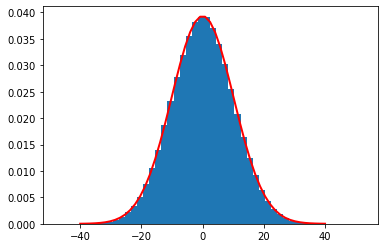

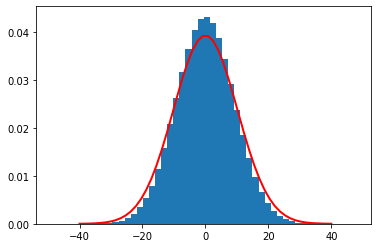

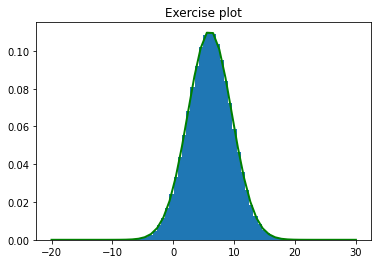

In [7]:
# We need to first create a multivariate normal random variable.
# For that we need to have its mean m and covariance matrix K.
m = [1,0]
K = [[1,1*3*1/2],[1*3*1/2,3**2]]
XYRV = st.multivariate_normal(m,K)
# sample from distribution
XY = XYRV.rvs(size=1000000) # Number of samples increased for a smoother histogram

Z = [2*x+3*y-2 for [x,y] in XY]
ZRV = st.norm(0,np.sqrt(103))
r = np.linspace(-40,40)
plt.hist(Z,50,density=True)
plt.plot(r,ZRV.pdf(r),'r',linewidth=2.0)

# What appears below is not part of the solution
# Note: If we generate X, Y independently, then the histogram and distribution do not match. 
rho = 1/2
X = st.norm.rvs(1, 1, 10000000)
Y = st.norm.rvs(0, 3, 10000000)
Z = 2 * X + 3 * Y - 2
ZRV = st.norm(0,np.sqrt(103))
r = np.linspace(-40,40)
plt.figure()
plt.hist(Z,50,density=True)
plt.plot(r,ZRV.pdf(r),'r',linewidth=2.0)

# Begin Solution:
import math
plt.figure()
print('See my solution below:')
mym = [1,0]
myK = [[1,1*3*0.5],[1*3*0.5,9]]
XYjoint = st.multivariate_normal(mym, myK)
myXY = XYjoint.rvs(size=1000000)
W = [x+y+5 for [x,y] in myXY]
W_ideal = st.norm(6,math.sqrt(13))
x = np.linspace(-20,30)
plt.hist(W,50,density=True)
plt.plot(x, W_ideal.pdf(x),'g', linewidth=2.0)
plt.title('Exercise plot')

# End Solution